<a href="https://colab.research.google.com/github/Leo2209/Active_Learning_DPB4/blob/main/dpb4_codigo_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [ ]:
#Gaussian function normalized
def gaussian_function_norm(min_val, max_val, mu, sd):
    x = np.linspace(min_val, max_val, 2000);# Generate 100 points between min_val and max_val
    x_norm=(x-min_val)/(max_val-min_val);
    gaussian = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_norm - mu) / sd)**2)  # Correct Gaussian formula
    gaussian=gaussian/np.max(gaussian);
    return x_norm, gaussian
#Gaussian function
def gaussian_function(min_val, max_val, mu, sd):
    x = np.linspace(min_val, max_val, 2000);# Generate 100 points between min_val and max_val
    gaussian = (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sd)**2);  # Correct Gaussian formula
    gaussian=gaussian/np.max(gaussian);
    return x, gaussian


In [ ]:
#DATASET:
#Physical properties:
[x1,den]=gaussian_function(1.1,1.305,1.21,0.06) #Density (g/cm^3)
[x2,mel]=gaussian_function(61.5,343,212.95,75.60) #Melting point (°C)
[x3,gla]=gaussian_function(-55,150,88.89,45.92); #Glass transition temperature (°C)
[x4,surf]=gaussian_function(26,45,35.82,5.75); #Surface tension (mN/m);


In [ ]:
#Tensile properties
[x5,tes]=gaussian_function(22.5,85,57.97,12.91) #Tensile strength ( MPa)
[x6,tem]=gaussian_function(1.05,320,15.28,61.94) # Tensile Modulus (GPa)
[x7,elo]=gaussian_function(6,650,101.48,158.98); # Elongation break (%)


In [ ]:
#Thermal properties
[x8,the]=gaussian_function(0.175,0.3,0.24,0.04) #Thermal conductivity (W/(m.K))
[x9,coe]=gaussian_function(37.5,150,77.80,22.45) # Tensile Modulus (10^-6/°C)


In [ ]:
#Chemical properties
[x10,wat]=gaussian_function(0.3,30,5.08,7.46) #Water absorbation (24h) (%)
[x11,sol]=gaussian_function(20.45,28.4,23.98,2.26) # Solubilty Parameter (MPa)
[x12,die]=gaussian_function(3.25,7.5,4.96,1.61); # Dielectric constant (MHZ)

#Optical properties
[x13,ref]=gaussian_function(1.485,1.71,1.52,0.05); # Refractive index

#Miscellaneous properties
[x14,flo]=gaussian_function(0.5,3.5,1.52,0.78); # Flory-Huggins Interaction Parameter(with water)
[x15,vis]=gaussian_function(0.75,5.5,1.56,1.11); # Intrinsic viscosity (dL/g)
[x16,hil]=gaussian_function(20.45,28.4,24.87,2.64); # Hildebrand Solubilty (MPa)
[x17,mon]=gaussian_function(44.05,288.3,109.62,77.50); # Monomer molecular weight (g/mol)
[x18,cry]=gaussian_function(0,40,19.86,11.72); # Cristallinity (%)
[x19,mol]=gaussian_function(2,4,2.78,0.75); # Molecular weight distribution (Mw/Mn)


In [ ]:
#Process Condition Factors
[x20,dis]=gaussian_function(6,30,14.92,4.93); # Distance (cm)
[x21,vol]=gaussian_function(8,70,21.45,11.88); # Voltage (kV)
[x22,con]=gaussian_function(3,35,14.56,6.55); # Concentration of polymer (wt%)
[x23,fee]=gaussian_function(0.002,14,1.63,2.76); # Feed rate (ml/h)


In [ ]:
#OUTPUT.
[y,dim]=gaussian_function(18.61,2540,411.10,399.87); # Diameter of electrspun FIBER

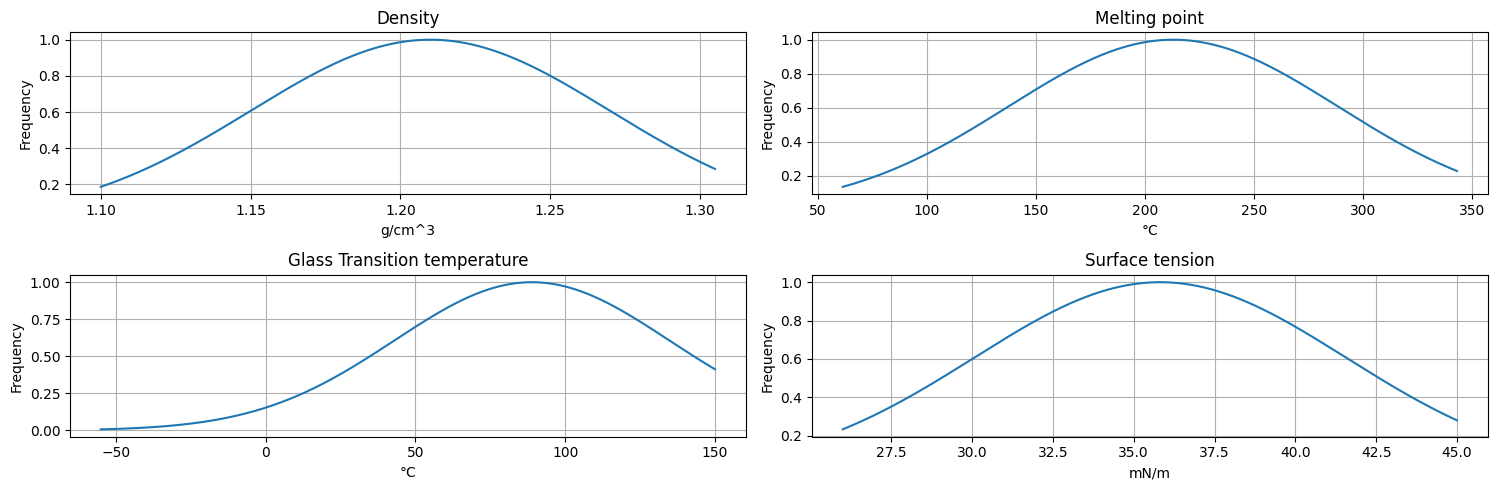

In [ ]:
#Plot the functions.

plt.figure(figsize=(15,5))
plt.subplot(221);plt.plot(x1,den,);plt.xlabel("g/cm^3");plt.ylabel("Frequency");plt.title("Density");plt.grid("on")
plt.subplot(222);plt.plot(x2,mel);plt.xlabel("°C");plt.ylabel("Frequency");plt.title("Melting point");plt.grid("on")
plt.subplot(223);plt.plot(x3,gla);plt.xlabel("°C");plt.ylabel("Frequency");plt.title("Glass Transition temperature");plt.grid("on")
plt.subplot(224);plt.plot(x4,surf);plt.xlabel("mN/m");plt.ylabel("Frequency");plt.title("Surface tension");plt.grid("on")
plt.tight_layout();plt.show()



In [ ]:
#